In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sqlalchemy import create_engine

In [3]:
# Note:: The make sure you use the information from your specific PostgreSQL installation
host = r'127.0.0.1' # denotes that the db in a local installation
db = r'MSDS610' # db we just created
user = r'postgres' # using the postgres user for this demo
pw = r'racharya001' # this is the password established during installation
port = r'5432' # default port estabalished during install

In [4]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [5]:
table_name = r'bike'
schema = r'raw' # schema were the data was loaded last week.

df = pd.read_sql_table(table_name, db_conn, schema)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        15641 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
 17  humidity    0 non-null      float64
dtypes: float64(5), int64(12), object(1)
memory usage: 2.4+ MB


Here, we have null on temp and windspeed. so, we can fill the gaps by using mean values. and as all of the column in humidity is null we can drop it.

In [20]:
df = df.drop(columns=['humidity'])

In [21]:
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240000,0.2879,0.81,0.000000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220000,0.2727,0.80,0.000000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.497179,0.2727,0.80,0.000000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240000,0.2879,0.75,0.000000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240000,0.2879,0.75,0.000000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.240000,0.2576,0.75,0.190155,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.497179,0.2727,0.80,0.000000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.200000,0.2576,0.86,0.000000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.240000,0.2879,0.75,0.000000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.320000,0.3485,0.76,0.000000,8,6,14


In [22]:
# 1.  Fill numeric missing values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

In [23]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)][column].values

outlier_columns = df.select_dtypes(include=[np.number]).columns 
outliers = {col: detect_outliers_iqr(df, col) for col in outlier_columns}

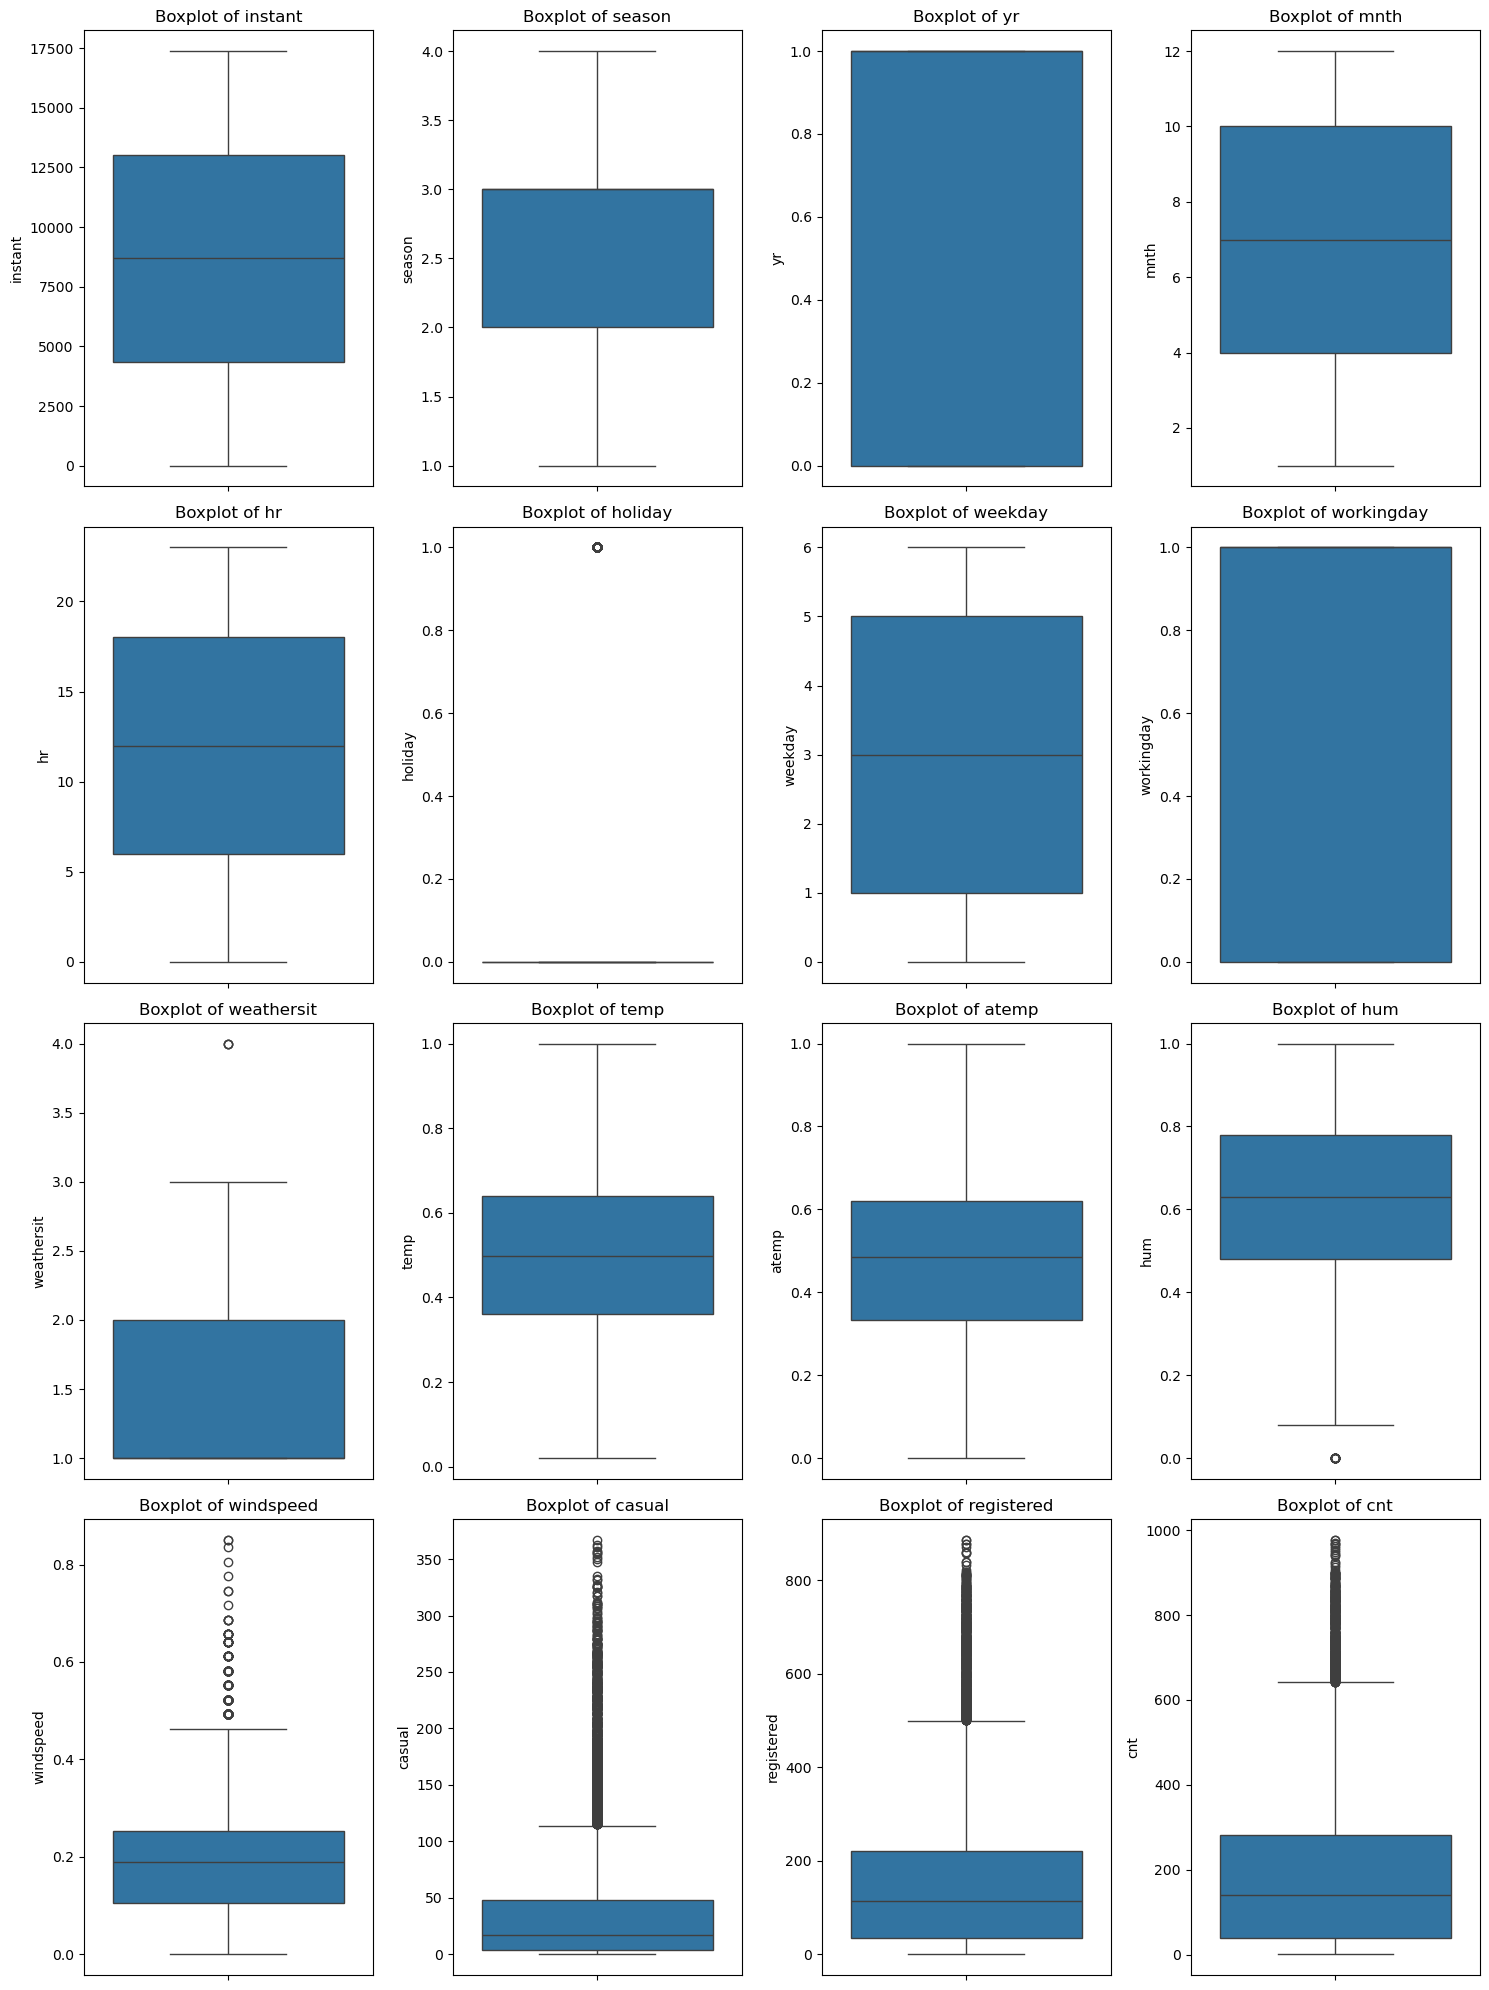

In [ ]:

# Select numerical columns for outlier detection
numeric_cols = df.select_dtypes(include=[np.number]).columns

num_cols = len(numeric_cols)
num_rows = (num_cols // 4) + (1 if num_cols % 4 != 0 else 0)  

# Create boxplots for detecting outliers
plt.figure(figsize=(15, 5 * num_rows))  
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, 4, i) 
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [27]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.497179,0.475775,0.627229,0.190155,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.182723,0.171850,0.192930,0.115660,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.360000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.497179,0.484800,0.630000,0.190155,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


As, we can see there is almost no outliers in the data we can move forward to find categorical column.

In [25]:
# 3. Identify Categorical Values and Convert to Category Type
categorical_columns = df.select_dtypes(include=['object']).columns  # Find categorical columns
df[categorical_columns] = df[categorical_columns].astype('category')

Inserting into new table.

In [26]:
table_name = r'bike_cleaned'
schema = r'cleaned' # schema we created this week.

df.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

17379